# Sampling: Aerobic vs. Anaerobic

Loading the appropirate Python and COBRApy packages

In [1]:
import cobra.test
from cobra.test import create_test_model
import numpy as np
import pandas as pd
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

Set model environmental conditions

In [2]:
model = create_test_model("textbook")
model.reactions.EX_o2_e.lower_bound = -20
model.reactions.EX_glc__D_e.lower_bound = -10

Academic license - for non-commercial use only - expires 2022-12-07
Using license file C:\Users\scott\gurobi.lic


## Key reactions

Below is a map of the *E.coli* core model that shows the locations of the key reactions that we will explore under both aerobic and anaerobic conditions. The reactions have been chosen to represent the key subsystems in the model.

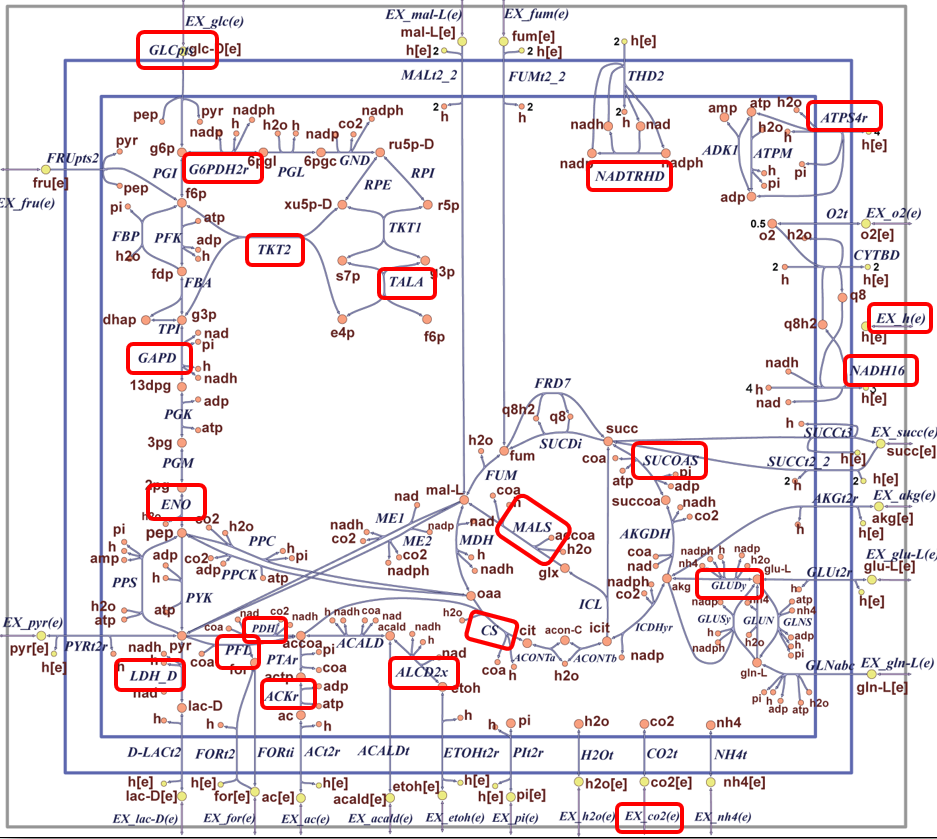

A list of these reactions includes:'GLCpts', 'G6PDH2r', 'TALA', 'TKT2', 'GAPD', 'ENO', 'LDH_D', 'PDH', 'PFL', 'ACKr', 'ALCD2x', 'CS', 'MALS', 'SUCOAS', 'GLUDy', 'NADH16', 'EX_h_e', 'ATPS4r', 'NADTRHD', 'ATPM',and the 'Biomass_Ecoli_core'.

## Aerobic model

Before we sample the model under aerobic conditions, let's plot the optimized values on an Escher plot and list the optimized fluxes for the key reactions that we will explore through the sampling process.

In [3]:
import escher
from escher import Builder
builder = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder

Builder()

In [4]:
solution = model.optimize()
builder.reaction_data = solution.fluxes

Looking at this Escher map we can see that glucose enters the glycolysis pathways at the upper left of the map, part of the flux is directed through the oxidative pathway of the pentose phophate pathway (PPP) with the remaining flux continuing in the glycolysis pathway. Part of that flux entering the PPP is diverted to precursors and part of it works it way through the non-oxidative pathway of the PPP back to the glycolysis pathway.

The flux in the glycolysis pathway continues downward until part of the flux is diverted through the anaplerotic reactions to the citric acid cycle (CAC) or TCA cycle. The remaining flux works it's way to the end of the glycolysis pathway and enters the fermentation pathways where part of the initial glucose carbon is secreted in the form of acetate.

Once the flux enters CAC it continues in a counterclockwise direction, feeding the precursors, until the initial carbon in the glucose is reduced to CO2 where it is secreted out of the cell.

Through the previously mentioned pathways NADH has been produced which feeds the electronic transport chain creating a proton-motive force that will create the ATP needed for aerobic cell operation.

Below are the optimized fluxes for the key reactions listed above.

In [5]:
key_reactions = ['GLCpts','G6PDH2r','TALA','TKT2','GAPD','ENO','LDH_D','PDH','PFL','ACKr','ALCD2x',
                 'CS','MALS','SUCOAS','GLUDy','NADH16','EX_h_e','ATPS4r','NADTRHD','ATPM','EX_co2_e',
                 'Biomass_Ecoli_core']
solution.fluxes[key_reactions]

GLCpts                10.000000
G6PDH2r                5.239871
TALA                   1.597669
TKT2                   1.297095
GAPD                  16.040040
ENO                   14.794450
LDH_D                  0.000000
PDH                    9.617674
PFL                    0.000000
ACKr                  -1.802563
ALCD2x                 0.000000
CS                     4.694642
MALS                   0.000000
SUCOAS                -3.796335
GLUDy                 -4.327176
NADH16                36.203665
EX_h_e                18.504792
ATPS4r                42.211457
NADTRHD                0.000000
ATPM                   8.390000
EX_co2_e              20.962585
Biomass_Ecoli_core     0.832614
Name: fluxes, dtype: float64

In [6]:
%%time
aerobic = sample(model, 10000, processes=4) #Set this to 1000 for faster, less accurate performance
aerobic

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpzxt2e3je.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Wall time: 23.4 s


,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,-3.921870,-0.870542,-3.775385,4.194189,4.194189,-3.775385,1.123557,0.062008,-0.044954,-3.051328,...,-1.325378,4.891087,5.893295,282.962080,-0.062008,1.294112,6.135341,1.294112,1.281538,7.048599
1,-5.211166,-0.634207,-4.308802,5.947964,5.947964,-4.308802,14.984909,0.158789,-0.084075,-4.576959,...,-0.288197,3.289878,4.067151,457.626578,-0.158789,0.249583,7.392373,0.249583,0.234055,9.514481
2,-0.470628,-0.049688,-4.461754,3.950912,3.950912,-4.461754,21.821177,0.790656,-0.338487,-0.420940,...,-1.368525,5.872294,8.298401,475.463276,-0.790656,1.289025,2.328444,1.289025,1.257054,8.079112
3,-2.314978,-0.064933,-6.179030,4.578728,4.578728,-6.179030,2.627794,1.486734,-0.325545,-2.250045,...,-0.210621,2.293781,2.599101,369.786159,-1.486734,0.179112,3.875809,0.179112,0.166441,9.632999
4,-1.629016,-0.525331,-5.915622,3.221928,3.221928,-5.915622,4.238831,1.493381,-0.550366,-1.103684,...,-1.185380,2.553136,6.171185,182.455604,-1.493381,1.164569,1.871166,1.164569,1.156200,8.353140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.286998,-5.286169,-1.812024,3.397538,3.397538,-1.812024,1.234323,0.379702,-0.051814,-0.000830,...,-1.388933,0.412179,2.415528,913.222548,-0.379702,1.323748,10.347556,1.323748,1.297534,8.020048
9996,-5.025713,-4.817606,-2.412117,4.325873,4.325873,-2.412117,1.333656,0.040878,-1.215810,-0.208107,...,-2.112249,5.412894,6.342933,972.105591,-0.040878,2.020405,4.035682,2.020405,1.983471,7.847494
9997,-3.863060,-3.647460,-3.644086,3.706289,3.706289,-3.644086,3.945310,0.208159,-0.925073,-0.215599,...,-1.978647,1.169122,1.580230,717.331427,-0.208159,1.898739,3.582285,1.898739,1.866605,7.572599
9998,-2.762537,-0.743685,-2.628135,5.010532,5.010532,-2.628135,1.662666,0.023465,-1.681386,-2.018851,...,-1.136522,9.216874,9.412112,597.594838,-0.023465,1.081923,17.022904,1.081923,1.059967,8.760576


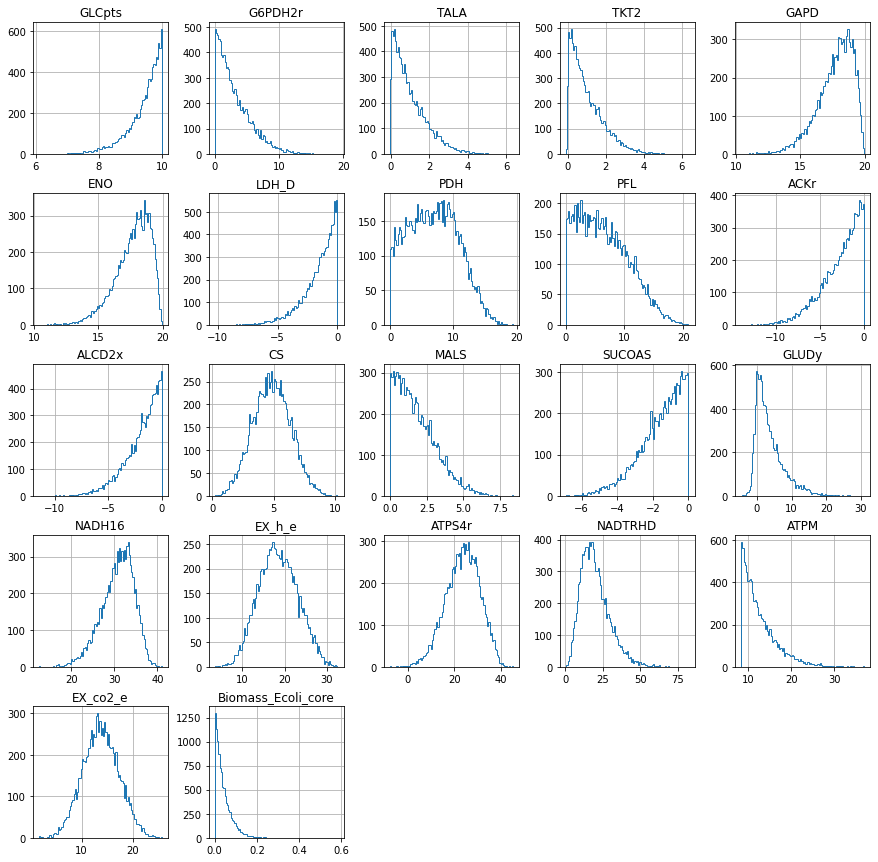

In [7]:
aerobic.hist(column = ['GLCpts','G6PDH2r','TALA','TKT2','GAPD','ENO','LDH_D','PDH','PFL',
                       'ACKr','ALCD2x','CS','MALS','SUCOAS','GLUDy','NADH16','EX_h_e','ATPS4r',
                       'NADTRHD','ATPM','EX_co2_e','Biomass_Ecoli_core'], 
                       bins=100,figsize=(15,15),histtype = 'step');

Glucose enters the glycolysis pathway through the GLCpts reaction. We can see the impact of the lower bound that we put on the glucose exchange reaction (EX_glc__D_e) by looking at the right side of the raction plot. The sharp boundary on the right shows that there is a reaction limitation but it also shows that there are many internal cellular configurations that could use less glucose. The peak to the right is the highest probability, or it has the most internal pathways to the solution space. The highest probability doesn't necessarily mean that it will be the flux in the optimized condition.

We can see that glucose enters the glycolysis pathways at the upper left of the map (GLCpts), with part of the flux directed through the oxidative pathway of the PPP (G6PDH2r) with the remaining flux continuing in the glycolysis pathway (GAPD). Part of that flux entering the PPP is diverted to precursors and part of it works it way through the non-oxidative pathway (TALA and TKT2) of the PPP back to the glycolysis pathway. In this case notice that as the entering glucose levels decrease the flux through the PPP increases. Also, note the the optimzed fluxes are not the peaks of the curves. The optimized fluxes for the PPP are G6PDH2r = 5.239871, TALA = 1.597669 and TKT2 = 1.297095 which are all toward the middle of the flux distributions.

The flux in the glycolysis pathway continues downward (GAPD and ENO) until part of the flux is diverted through the anaplerotic reactions to the citric acid cycle (CAC) or TCA cycle. Both of these reactions have similar curves. The remaining flux works it's way to the end of the glycolysis pathway and enters the fermentation pathways (LDH_D PDH, and PFL. Although there are many network configurtations that could produce lactate (LDH_D) and ethonal (ALCD2x), in the optimized setting, neither lactate or ethanol are produced. On the other hand there are many states that will support the secretion of acetate (ACKr) which is used in the cell optimization.

Once the flux enters CAC (CS and SUCOAS) it continues in a counterclockwise direction, feeding the precursors, until the initial carbon in the glucose is reduced to CO2 (EX_co2_e) where it is secreted out of the cell. Note that there is no flux flowiing through the glycoxylate pathway (MALS) in the optimized setting in spite of the fact that there are many potential states available. 

Through the previously mentioned pathways NADH has been produced which feeds the electronic transport chain (ETC) (NADH16) creating a proton-motive force that will create the ATP (ATPS4r) needed for aerobic cell operation.
Note that the the optimized flux values for the ETC are close to the peak values of the reaction distributions; NADH16 = 36.203665 and ATPS4r = 42.211457.

Finally, note that the secreted values CO2 (EX_co2_e = 20.962585) and the biomass function (Biomass_Ecoli_core = 0.832614) are not near their pick distribution values.

## Anaerobic model

Now let's do the same sampling of an anaerobic model.

In [8]:
model2 = create_test_model("textbook")
model2.reactions.EX_o2_e.lower_bound = -0
model2.reactions.EX_glc__D_e.lower_bound = -10

Creating an Escher map of the anaerobic condition

In [9]:
import escher
from escher import Builder
builder2 = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder2

Builder()

In [10]:
solution2 = model2.optimize()
builder2.reaction_data = solution2.fluxes

List the optimzed fluxes for the anaerobic condition

In [11]:
solution2.fluxes[key_reactions]

GLCpts                10.000000
G6PDH2r                0.000000
TALA                  -0.037867
TKT2                  -0.114277
GAPD                  19.437336
ENO                   19.120689
LDH_D                  0.000000
PDH                    0.000000
PFL                   17.804674
ACKr                  -8.503585
ALCD2x                -8.279455
CS                     0.228363
MALS                   0.000000
SUCOAS                 0.000000
GLUDy                 -1.100034
NADH16                 0.000000
EX_h_e                30.554218
ATPS4r                -5.452053
NADTRHD                0.000000
ATPM                   8.390000
EX_co2_e              -0.378178
Biomass_Ecoli_core     0.211663
Name: fluxes, dtype: float64

Notice that for this anaerobic condition 

1. The oxidative pathway of the PPP is shut-off (G6PDH2r)
2. The reductive pathway of the CAC is shut-off (PDH, SUCOAS, MALS)
3. The ETC is shut-off (NADH16, ATPS4r)
4. Most of the fermentation pathways are active (PFL, ACKr, ALCD2x)

Now let's see how the sampling supports this network configuration

Sampling the anaerobic model

In [12]:
anaerobic = sample(model2, 10000, processes=4) #Set this to 1000 for faster, less accurate performance
anaerobic

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmpazvldzw7.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,-8.672876,-0.567409,-3.153220,1.203593,1.203593,-3.153220,0.509515,0.401841,-0.365705,-8.105467,...,-0.012318,0.623354,2.544549,381.647812,-0.401841,0.009811,3.483243,0.009811,0.008803,9.247522
1,-10.360448,-1.162585,-6.205182,0.763750,0.763750,-6.205182,0.196963,0.139305,-0.420981,-9.197864,...,-0.269580,0.556691,1.859764,255.087256,-0.139305,0.261839,10.852685,0.261839,0.258725,9.687098
2,-8.681477,-0.769366,-5.490103,1.067074,1.067074,-5.490103,0.284451,0.442288,-0.114956,-7.912111,...,-0.008428,0.447395,3.115068,57.593885,-0.442288,0.003580,5.822778,0.003580,0.001630,9.805284
3,-8.986965,-0.046598,-5.932753,0.800890,0.800890,-5.932753,0.353625,0.446863,-0.016848,-8.940366,...,-0.331706,2.788072,5.238969,89.328611,-0.446863,0.328110,6.064430,0.328110,0.326664,9.606342
4,-9.800998,-0.385682,-4.119576,0.663321,0.663321,-4.119576,0.757289,0.109970,-0.075463,-9.415316,...,-0.294296,1.394963,2.291410,316.913971,-0.109970,0.293875,3.101051,0.293875,0.293706,9.637875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-12.016305,-0.245880,-1.297464,1.205658,1.205658,-1.297464,0.696866,0.354712,-0.192774,-11.770426,...,-0.039388,0.491918,1.524366,707.007383,-0.354712,0.015587,0.647196,0.015587,0.006016,9.712097
9996,-9.726352,-0.046155,-2.577450,1.468059,1.468059,-2.577450,1.205472,0.415763,-0.881634,-9.680197,...,-0.182861,0.363082,2.770816,518.775847,-0.415763,0.173597,3.127143,0.173597,0.169871,9.670280
9997,-10.883390,-0.475931,-2.942277,1.387971,1.387971,-2.942277,0.644983,0.340967,-0.778422,-10.407459,...,-0.448163,0.440426,1.344776,555.693348,-0.340967,0.439525,0.464546,0.439525,0.436052,9.546205
9998,-12.364482,-0.354795,-1.239709,1.312833,1.312833,-1.239709,0.467473,0.152381,-0.914447,-12.009687,...,-0.175149,0.557168,1.338730,580.847926,-0.152381,0.170604,2.587841,0.170604,0.168776,9.756925


Plotting the histograms for the same reactions as above.

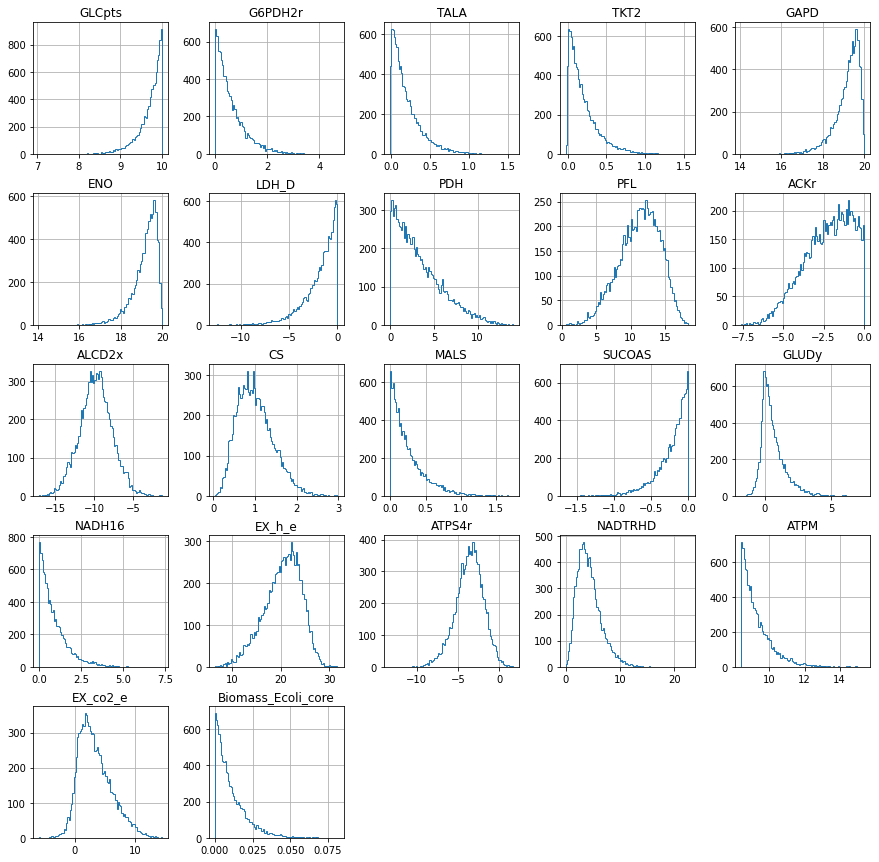

In [13]:
anaerobic.hist(column = ['GLCpts','G6PDH2r','TALA','TKT2','GAPD','ENO','LDH_D','PDH','PFL',
                       'ACKr','ALCD2x','CS','MALS','SUCOAS','GLUDy','NADH16','EX_h_e','ATPS4r',
                       'NADTRHD','ATPM','EX_co2_e','Biomass_Ecoli_core'], 
        bins=100,figsize=(15,15),histtype = 'step');

To see how these probability distribtuions shift with the state of the cell, let's plot the difference between these aerobic and anaerobic flux distributions.

## Comparison between aerobic and anaerobic models

Now let's print out a collection of subplots comparing all the reactions in the previous list.

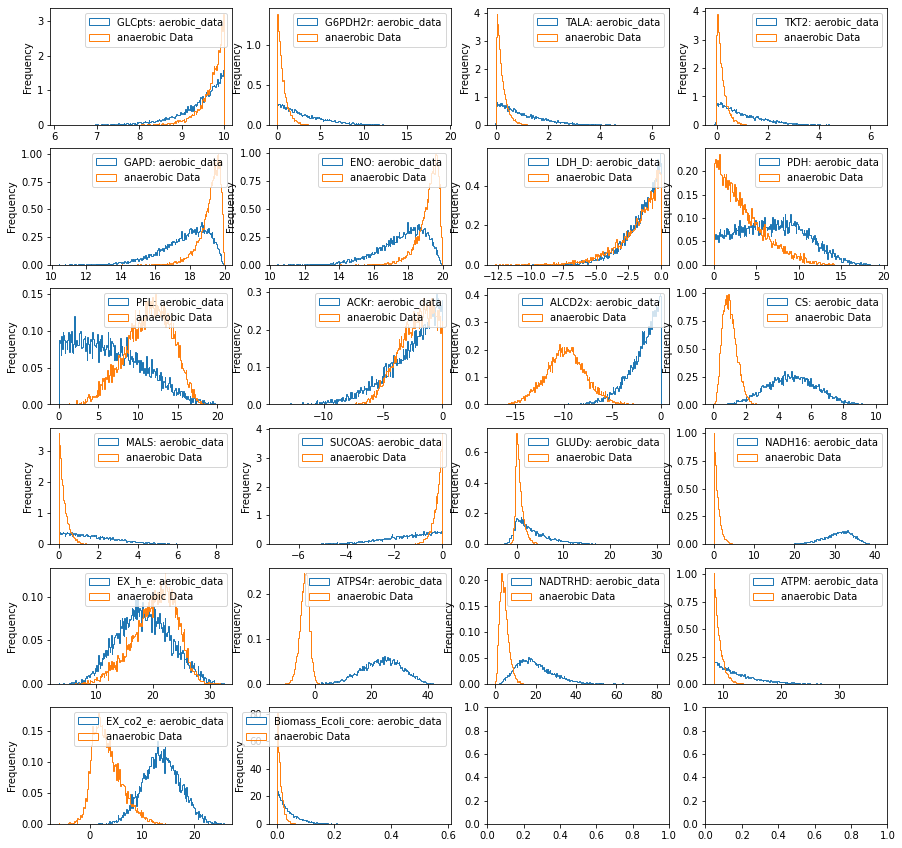

In [14]:
reactions = ['GLCpts','G6PDH2r','TALA','TKT2','GAPD','ENO','LDH_D','PDH','PFL',
             'ACKr','ALCD2x','CS','MALS','SUCOAS','GLUDy','NADH16','EX_h_e','ATPS4r',
             'NADTRHD','ATPM','EX_co2_e','Biomass_Ecoli_core']
fig, axes = plt.subplots(nrows=6, ncols=4)
j=0
for i in range(len(reactions)):
    aerobic_data=aerobic[reactions[i]]
    anaerobic_data=anaerobic[reactions[i]]
    temp = pd.DataFrame({reactions[i]+ ': aerobic_data':aerobic_data, "anaerobic Data":anaerobic_data})
    temp.plot.hist(bins=250, histtype = 'step',ax=axes[j%6,i%4],figsize=(15,15),density=True)
    if (i != 0 and (i+1)%4 == 0):
        j += 1

Let's look at the impact to the flux distribution of each reaction.

1. 'GLCpts' - The flux distribution narrows during anaerobic operation indicating that there are fewer states available at lower glucose uptake levels.
2. 'G6PDH2r' - The flux distribution narrows indicating that there is a low probability of high fluxes in the PPP.
3. 'TALA' - The flux distribution narrows indicating that there is a low probability of high fluxes in the PPP.
4. 'TKT2' - The flux distribution narrows indicating that there is a low probability of high fluxes in the PPP.
5. 'GAPD' - The flux distribution narrows indicating that there will be higher fluxes in the glycolysis pathway under anaerobic conditions.
6. 'ENO' - The flux distribution narrows indicating that there will be higher fluxes in the glycolysis pathway under anaerobic conditions.
7. 'LDH_D' - The probability distribution of fluxes is the same under either condition.
8. 'PDH' - The flux distribution narrows under anaerobic conditions indicating that there will be higher fluxes in under aerobic conditions.
9. 'PFL' - Under anaerobic conditions the entire flux distribution shifts to higher flux values. 
10. 'ACKr' - The flux distribution narrows under aerobic conditions but still similar to the aerobic flux distribution.
11. 'ALCD2x' - The flux distribution shifts to higher flux values under anaerobic conditions (note the reaction is operating in reverse mode). The impication is that if ethanol is a desired bioproduct the enviironment will have to be anaerobic.
12. 'CS' - Under anaerobic conditions the flux distribution narrows and shifts to lower values indicating that under anerobic conditions there will be lower flux values through the oxidative pathway of the CAC.
13. 'MALS' - Under anaerobic conditions the flux distribution narrows and shifts to lower values indicating that under anerobic conditions there will be lower flux values through the glycoxylate pathway.
14. 'SUCOAS' - Under anaerobic conditions the flux distribution narrows and shifts to lower values (reaction is operating in reverse mode) indicating that under anerobic conditions there will be lower flux values through the oxidative pathway of the CAC.
15. 'GLUDy' - Under anaerobic conditions the flux distribution narrows and shifts to lower values indicating that under anerobic conditions there will be lower flux values 
16. 'NADH16', - The aerobic flux distribution indicates that higher flux values are possible than in anaerobic conditions.
17. 'EX_h_e' - Similar flux distributions
18. 'ATPS4r' - The anaerobic flux distribution is on the negative side indicating that under those conditions the protons will be pumped into the extracellualr space. The broad distribution on the right for aerobic conditions indicates large ATP production
19. 'NADTRHD' - Higher flux under aerobic conditions indicating strong ETC activity
20. 'ATPM' - Higher flux under aerobic conditions or more ATP will need to be converted to ADP
21. 'EX_co2_e' - The two separate distributions indicate that more CO2 will be produced in aerobic conditions
22. 'Biomass_Ecoli_core - The broad aerobic distribution indicates that there range of larger growth rates than in the anaerobic condition.